Tome una ecuación determinada, por ejemplo una raíz cuadrada o
cúbica, o un seno, genere un data set con muchos valores. Con base en ese data set y utilizando
una herramienta de ML, encuentre un modelo para el cálculo de la raíz cuadrada. Úselo con 10
ejemplos y compare los resultados con los que da la función del lenguaje.

1. Generación de Datos para la Raíz Cuadrada

En este paso, se utiliza la biblioteca numpy para generar un conjunto de datos que represente la relación entre la variable independiente X y la variable dependiente y, que es la raíz cuadrada de X. Se crean 1000 puntos de datos aleatorios en el rango de 0 a 10 utilizando np.random.rand. Estos datos se visualizan utilizando matplotlib.

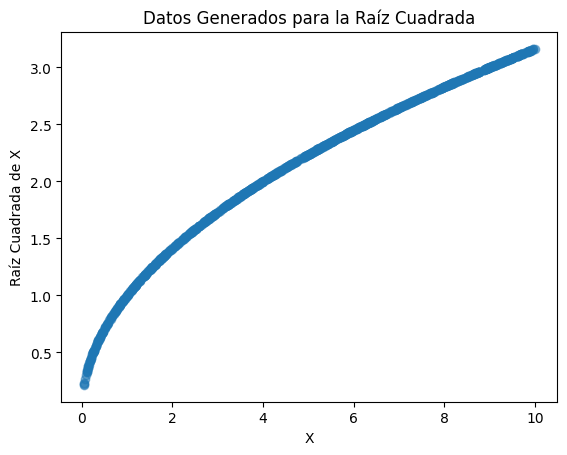

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Generar datos para la raíz cuadrada
np.random.seed(42)  # Para reproducibilidad
X = np.random.rand(1000) * 10  # Valores aleatorios entre 0 y 10
y = np.sqrt(X)

# Visualizar los datos generados
plt.scatter(X, y, alpha=0.5)
plt.title('Datos Generados para la Raíz Cuadrada')
plt.xlabel('X')
plt.ylabel('Raíz Cuadrada de X')
plt.show()


2. Entrenamiento del Modelo de Regresión Lineal

Se emplea el modelo de regresión lineal de la biblioteca scikit-learn para entrenar un modelo basado en el conjunto de datos generado. El modelo se instancia como LinearRegression(), y se entrena utilizando el método fit con las variables X e y.

In [29]:
from sklearn.linear_model import LinearRegression

# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X.reshape(-1, 1), y)


LinearRegression()

3. Generación de Predicciones

Se generan 10 ejemplos para los cuales se realizarán predicciones utilizando el modelo entrenado. Estos ejemplos se almacenan en un array llamado ejemplos. Luego, se utilizan estas muestras para predecir la raíz cuadrada correspondiente con el método predict del modelo de regresión lineal.

In [30]:
# Generar 10 ejemplos para predecir
ejemplos = np.array([1.5, 2.0, 3.0, 4.5, 6.0, 7.0, 8.0, 9.5, 10.0, 12.0,16,18]).reshape(-1, 1)

# Predecir con el modelo
predicciones = model.predict(ejemplos)


4. Comparación de Resultados

Finalmente, se comparan las predicciones del modelo con los valores reales de la raíz cuadrada para los 10 ejemplos. La salida incluye la muestra, la predicción del modelo y el valor real de la raíz cuadrada de la muestra, proporcionando una comparación fácil de los resultados obtenidos por el modelo con respecto a la función original.


In [31]:
# Mostrar resultados
for i in range(len(ejemplos)):
    print(f"Ejemplo: {ejemplos[i][0]}, Predicción: {predicciones[i]:5f}, Raíz Cuadrada: {np.sqrt(ejemplos[i][0]):5f}, Error : {((np.sqrt(ejemplos[i][0]-predicciones[i]))):5f},Error relativo: {(abs(np.sqrt(ejemplos[i][0]-predicciones[i]))/ejemplos[i][0]):5f}")

Ejemplo: 1.5, Predicción: 1.217195, Raíz Cuadrada: 1.224745, Error : 0.531794,Error relativo: 0.354529
Ejemplo: 2.0, Predicción: 1.344159, Raíz Cuadrada: 1.414214, Error : 0.809840,Error relativo: 0.404920
Ejemplo: 3.0, Predicción: 1.598085, Raíz Cuadrada: 1.732051, Error : 1.184025,Error relativo: 0.394675
Ejemplo: 4.5, Predicción: 1.978975, Raíz Cuadrada: 2.121320, Error : 1.587774,Error relativo: 0.352839
Ejemplo: 6.0, Predicción: 2.359865, Raíz Cuadrada: 2.449490, Error : 1.907914,Error relativo: 0.317986
Ejemplo: 7.0, Predicción: 2.613792, Raíz Cuadrada: 2.645751, Error : 2.094328,Error relativo: 0.299190
Ejemplo: 8.0, Predicción: 2.867718, Raíz Cuadrada: 2.828427, Error : 2.265454,Error relativo: 0.283182
Ejemplo: 9.5, Predicción: 3.248608, Raíz Cuadrada: 3.082207, Error : 2.500278,Error relativo: 0.263187
Ejemplo: 10.0, Predicción: 3.375571, Raíz Cuadrada: 3.162278, Error : 2.573797,Error relativo: 0.257380
Ejemplo: 12.0, Predicción: 3.883425, Raíz Cuadrada: 3.464102, Error : 2.

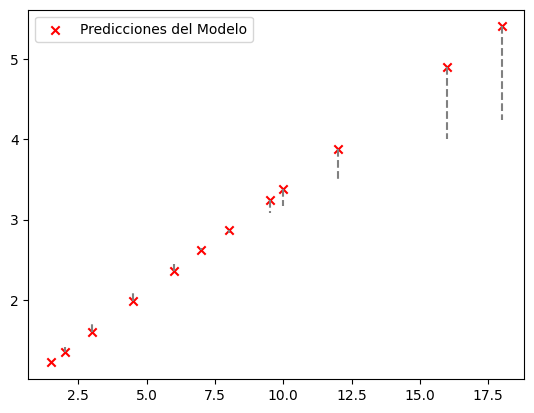

In [32]:
# Dibujar las predicciones
plt.scatter(ejemplos, predicciones, color='red', marker='x', label='Predicciones del Modelo')

# Dibujar las líneas que conectan las predicciones con los valores reales
for i in range(len(ejemplos)):
    plt.plot([ejemplos[i][0], ejemplos[i][0]], [predicciones[i], np.sqrt(ejemplos[i][0])], color='gray', linestyle='--')

# Mostrar leyenda
plt.legend()

# Mostrar la gráfica
plt.show()

A continuación lo mismo pero con Redes Neuronales.

1/1 [==============================] - 0s 47ms/step


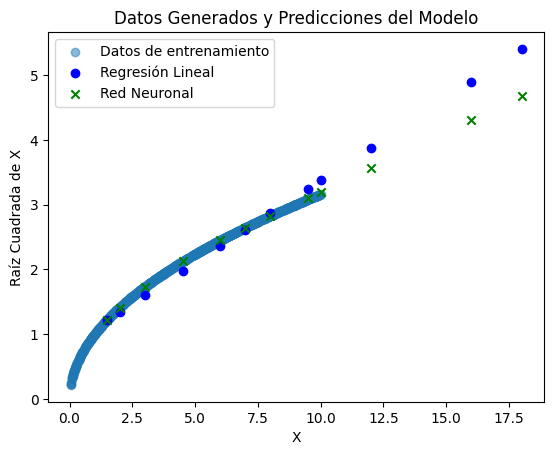

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.linear_model import LinearRegression
from tensorflow import keras
from tensorflow.keras import layers

# Generar datos para la raíz cuadrada
np.random.seed(42)
X = np.random.rand(1000) * 10
y = np.sqrt(X)

# Visualizar los datos generados
plt.scatter(X, y, alpha=0.5, label='Datos de entrenamiento')
plt.title('Datos Generados y Predicciones del Modelo')
plt.xlabel('X')
plt.ylabel('Raíz Cuadrada de X')

# Entrenar el modelo de regresión lineal
model_regresion_lineal = LinearRegression()
model_regresion_lineal.fit(X.reshape(-1, 1), y)

# Generar 10 ejemplos para predecir
ejemplos = np.array([1.5, 2.0, 3.0, 4.5, 6.0, 7.0, 8.0, 9.5, 10.0, 12.0,16,18]).reshape(-1, 1)

# Predecir con el modelo de regresión lineal
predicciones_regresion_lineal = model_regresion_lineal.predict(ejemplos)

# Entrenar una red neuronal simple
model_red_neuronal = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(1,)),
    layers.Dense(1)
])

model_red_neuronal.compile(optimizer='adam', loss='mean_squared_error')
model_red_neuronal.fit(X, y, epochs=100, batch_size=32, verbose=0)

# Predecir con la red neuronal
predicciones_red_neuronal = model_red_neuronal.predict(ejemplos)

# Dibujar las predicciones de regresión lineal
plt.scatter(ejemplos, predicciones_regresion_lineal, color='blue', marker='o', label='Regresión Lineal')

# Dibujar las predicciones de la red neuronal
plt.scatter(ejemplos, predicciones_red_neuronal, color='green', marker='x', label='Red Neuronal')

# Mostrar leyenda
plt.legend()

# Mostrar la gráfica
plt.show()
